## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [96]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [97]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [98]:
#Import the kc house data set
housingInfo = pd.read_csv('kc_house_data.csv')
housingInfo.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [99]:
# inspect housingInfo dataframe

print("*********************************  Info *******************************************") 
print(housingInfo.info())
print("*********************************  Shape ******************************************") 
print(housingInfo.shape)
print("**************************** Columns having null values *****************************")
print(housingInfo.isnull().any())
print("**************************** Describe *****************************")
housingInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode   

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Step 2: Data Cleaning 

#### Removing/Imputing NaN values in Categorical attributes

In [100]:
# check for null values in all categorical columns

housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

#### Remove categorical attributes that have more than 85% data associated to one value.

    - We will remove any column that has one value repeating 18370 times (18370/21613)*100 = 85%) as this column would be skewed
      to one value

In [101]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingInfo[col].value_counts().max() >= 18370):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
# once again check for null values in all categorical columns

housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables 

#### Removing null values in Numerical attributes

In [103]:
# check the null values in the numerical data

housingInfo.select_dtypes(include=['int64','float']).isnull().sum()[housingInfo.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

#### Remove numerical attributes that have more than 85% data associated to one value.

    - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would 
    be skewed to one value

In [104]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)



In [105]:
# check for percentage of null values in each column

percent_missing = round(100*(housingInfo.isnull().sum()/len(housingInfo.index)), 2)
print(percent_missing)

id               0.0
date             0.0
price            0.0
sqft_living      0.0
sqft_lot         0.0
sqft_above       0.0
yr_built         0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


Hence there are no null values in the dataset

#### Check for Duplicates

In [106]:
# Check if there are any duplicate values in the dataset

housingInfo[housingInfo.duplicated(keep=False)]

,id,date,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicate entries found !!!

#### Outlier Treatment

In [107]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housingInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,2079.899736,1.510697e+04,1788.390691,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,918.440897,4.142051e+04,828.090978,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,290.000000,5.200000e+02,290.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,1427.000000,5.040000e+03,1190.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068800e+04,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
90%,8.732028e+09,8.870000e+05,3250.000000,2.139760e+04,2950.000000,2007.000000,98155.000000,47.727900,-122.022000,2930.000000,17852.400000
95%,9.297300e+09,1.156480e+06,3760.000000,4.333920e+04,3400.000000,2011.000000,98177.000000,47.749640,-121.979000,3300.000000,37062.800000
99%,9.558728e+09,1.964400e+06,4978.800000,2.130080e+05,4370.000000,2014.000000,98199.000000,47.772688,-121.783000,4080.000000,157687.000000


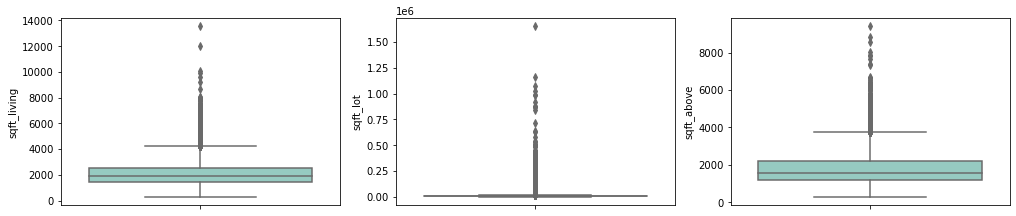

In [108]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'sqft_living', palette='Set3', data = housingInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'sqft_lot', palette='Set3', data = housingInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'sqft_above', palette='Set3', data = housingInfo)
plt.show()

In [109]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingInfo['sqft_living'].quantile(0.98)
housingInfo = housingInfo[housingInfo["sqft_living"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingInfo['sqft_lot'].quantile(0.98)
housingInfo = housingInfo[housingInfo["sqft_lot"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingInfo['sqft_above'].quantile(0.99)
housingInfo = housingInfo[housingInfo["sqft_above"] < nn_quartile_TotalBsmtSF]



In [110]:
# Determine the percentage of data retained

num_data = round(100*(len(housingInfo)/21613),2)
print(num_data)

95.03


## Step 3: Data Visualization 

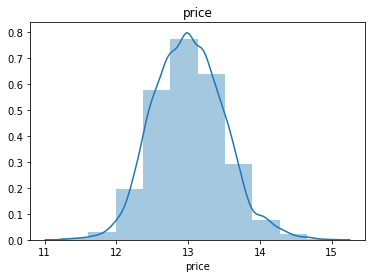

In [111]:
# Visualise the target variable -> SalePrice after transforming the sales price

housingInfo['price'] = np.log1p(housingInfo['price'])

plt.title('price')
sns.distplot(housingInfo['price'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 720x360 with 0 Axes>

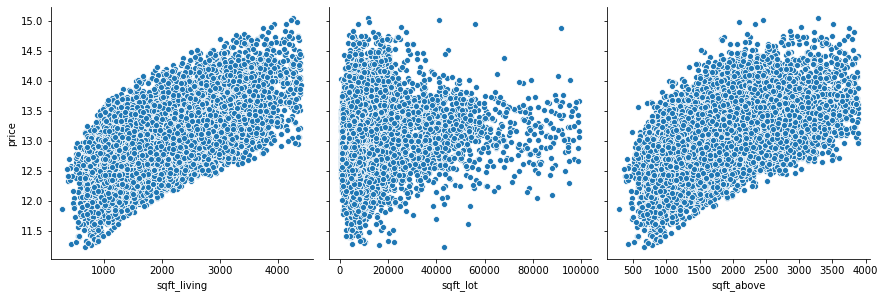

In [112]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housingInfo, x_vars=['sqft_living','sqft_lot','sqft_above'], y_vars='price',height=4, aspect=1,kind='scatter')
plt.show()

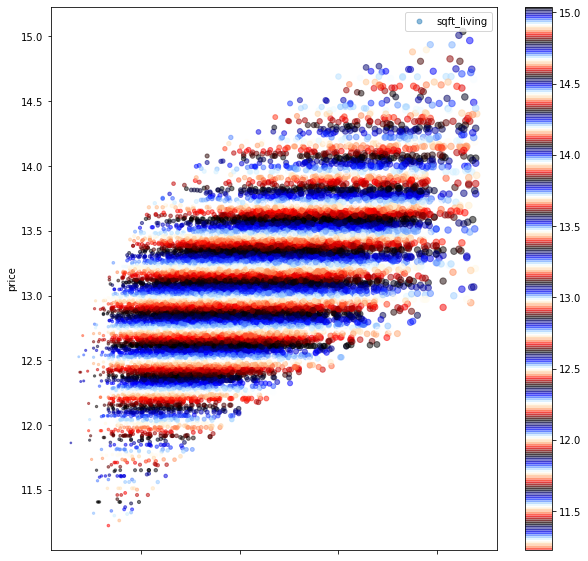

In [113]:
housingInfo.plot(kind='scatter', x='sqft_living', y='price', alpha=0.5,
         s=housingInfo['sqft_living']/100, label='sqft_living',   # set symbol size on population
         c=housingInfo['price'],                  #  set symbol color on house value    
         cmap=plt.get_cmap('flag'),      
         colorbar=True,
         figsize=(10,10))
plt.legend()


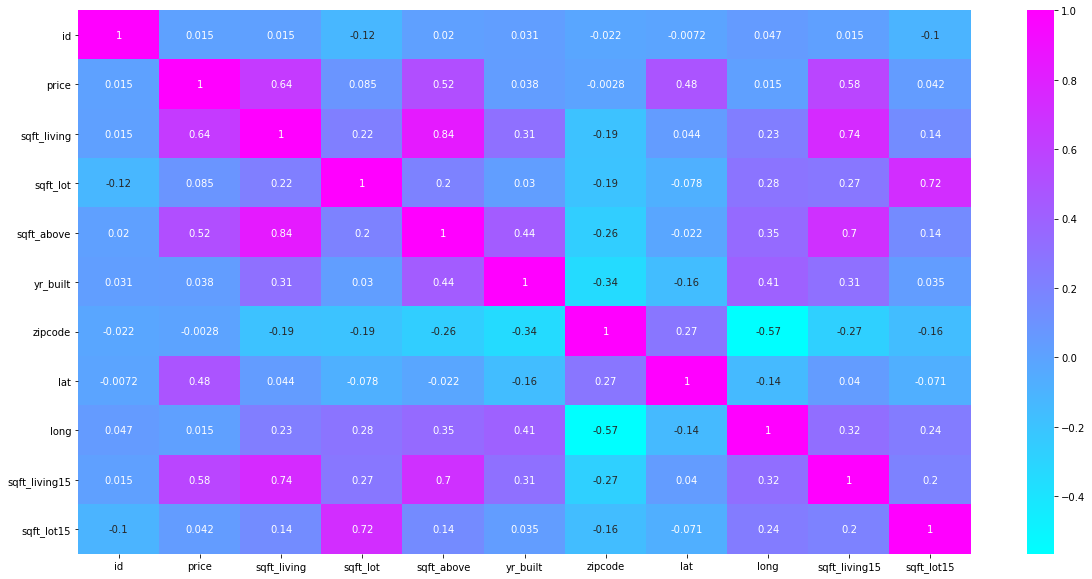

In [114]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housingInfo.corr(), annot = True, cmap="cool")
plt.show()

In [115]:
# Check the shape of the dataframe

housingInfo.shape

(20539, 12)

## Step 4: Data Preparation

  - Converting categorical data into numercal data 
  - Creating Dummies

In [116]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

housingInfo = housingInfo.drop(['date'], axis=1)

housingInfo.head()

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,12.309987,1180,5650,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,13.195616,2570,7242,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,12.100718,770,10000,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,13.311331,1960,5000,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,13.142168,1680,8080,1680,1987,98074,47.6168,-122.045,1800,7503


In [117]:
housingInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20539 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20539 non-null  int64  
 1   price          20539 non-null  float64
 2   sqft_living    20539 non-null  int64  
 3   sqft_lot       20539 non-null  int64  
 4   sqft_above     20539 non-null  int64  
 5   yr_built       20539 non-null  int64  
 6   zipcode        20539 non-null  int64  
 7   lat            20539 non-null  float64
 8   long           20539 non-null  float64
 9   sqft_living15  20539 non-null  int64  
 10  sqft_lot15     20539 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.9 MB


All columns in the data set are now numeric !!!

## Step 5: Train Test Split

In [118]:
# Putting all feature variable to X

X = housingInfo.drop(['price'], axis=1)
X.head()

,id,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1180,5650,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2570,7242,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,770,10000,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,1960,5000,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,1680,8080,1680,1987,98074,47.6168,-122.045,1800,7503


In [119]:
# Putting response variable to y

y = housingInfo['price']
y.head()

0    12.309987
1    13.195616
2    12.100718
3    13.311331
4    13.142168
Name: price, dtype: float64

#### Scaling the features

In [120]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['id', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 6: Model Building and Evaluation

#### Ridge

In [122]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.223267,-0.223464,1
1,0.001,-0.223267,-0.223464,2
2,0.01,-0.223267,-0.223464,3
3,0.1,-0.223268,-0.223464,4
4,0.2,-0.223268,-0.223464,5
5,0.3,-0.223268,-0.223464,6
6,0.4,-0.223268,-0.223464,7
7,0.5,-0.223268,-0.223464,8
8,0.6,-0.223268,-0.223464,9
9,0.7,-0.223268,-0.223464,10


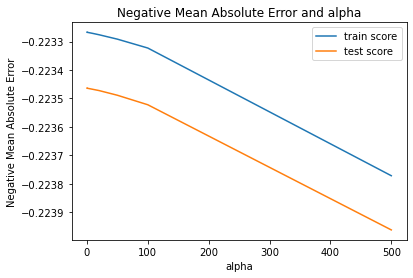

In [124]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [125]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=0.0001)

In [126]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00517577,  0.21515997, -0.01588505,  0.0336108 , -0.05800421,
       -0.0289756 ,  0.2151833 , -0.04990742,  0.12262461, -0.00287675])

In [127]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.08198806253281148

In [128]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,id,0.0052
1,sqft_living,0.2152
2,sqft_lot,-0.0159
3,sqft_above,0.0336
4,yr_built,-0.0580
5,zipcode,-0.0290
6,lat,0.2152
7,long,-0.0499
8,sqft_living15,0.1226
9,sqft_lot15,-0.0029


In [129]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'id': 0.0052,
 'sqft_living': 0.2152,
 'sqft_lot': -0.0159,
 'sqft_above': 0.0336,
 'yr_built': -0.058,
 'zipcode': -0.029,
 'lat': 0.2152,
 'long': -0.0499,
 'sqft_living15': 0.1226,
 'sqft_lot15': -0.0029}

#### Lasso

In [130]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.003,-0.223160,-0.223360,1
6,0.002,-0.223164,-0.223364,2
8,0.004,-0.223191,-0.223385,3
5,0.001,-0.223202,-0.223399,4
4,0.0005,-0.223231,-0.223428,5
9,0.005,-0.223250,-0.223433,6
3,0.0004,-0.223238,-0.223435,7
2,0.0003,-0.223245,-0.223442,8
1,0.0002,-0.223252,-0.223449,9
0,0.0001,-0.223260,-0.223456,10


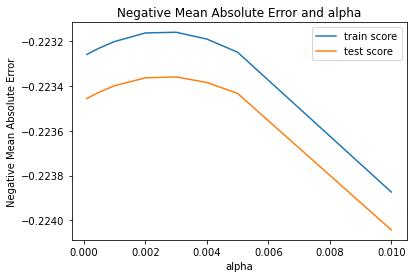

In [132]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [133]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [134]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.00480626,  0.21569854, -0.01562016,  0.03258511, -0.0573289 ,
       -0.02798449,  0.21488922, -0.04908524,  0.12234748, -0.00264244])

In [135]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.08198015091280893

In [136]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,id,0.0048
1,sqft_living,0.2157
2,sqft_lot,-0.0156
3,sqft_above,0.0326
4,yr_built,-0.0573
5,zipcode,-0.0280
6,lat,0.2149
7,long,-0.0491
8,sqft_living15,0.1223
9,sqft_lot15,-0.0026


In [137]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'id': 0.004806262994321209,
 'sqft_living': 0.2156985402856176,
 'sqft_lot': -0.015620155823432635,
 'sqft_above': 0.03258510907760687,
 'yr_built': -0.05732889676071763,
 'zipcode': -0.027984485692400935,
 'lat': 0.21488922239968622,
 'long': -0.04908523554430867,
 'sqft_living15': 0.12234748038622982,
 'sqft_lot15': -0.002642441674201707}

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 0.0001
    - Lasso - 0.002
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.07930019743559732
    - Lasso - 0.07929884426801526

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

    
Therefore, the variables predicted by Lasso are significant variables for predicting the 
price of a house.